<a href="https://colab.research.google.com/github/vkvinay0627/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#connecting colab with google drive for importing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading and storing data with pandas
df=pd.read_excel("/content/drive/MyDrive/AlmaBetter Projects/Online Retail Customer Segmentation - Vinay Kumar/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns

In [ ]:
#checking for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* CustomerID column has 135080 Null values and without knowing the ID of the customer we can not put that customer in specific segment.

In [ ]:
#dropping all the null values
df.dropna(inplace=True)

In [ ]:
#checking number of records
df.shape

(406829, 8)

* After removeing null value in our dataset .it reduces to (406829, 8)

In [ ]:
#converting invoice number to string for getting cancelled orders
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [ ]:
#displaying all the cancelled orders
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#storing all not cancelled order
df=df[~df['InvoiceNo'].str.contains("C")]

* It is mentioned in the problem statement that column InvoiceNo which starts with 'c' indicates cancellation which is redundant data so we must drop this data.

In [ ]:
#number of data present
df.shape

(397924, 8)

In [ ]:
# statistical info
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


##**Exploratory Data Analysis**

In [ ]:
#exploring most sold item name
df_sold = df['Description'].value_counts().reset_index()
df_sold.rename(columns={'index':'Item_Name'},inplace=True)
df_sold.rename(columns={'Description':'Count'},inplace=True)
df_sold.head()

,Item_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
#exploring least sold item name
df_sold.tail()

,Item_Name,Count
3872,JARDIN ETCHED GLASS BUTTER DISH,1
3873,PINK BAROQUE FLOCK CANDLE HOLDER,1
3874,GLASS AND BEADS BRACELET IVORY,1
3875,RUBY GLASS CLUSTER NECKLACE,1
3876,BLACK GLASS BRACELET W HEART CHARMS,1


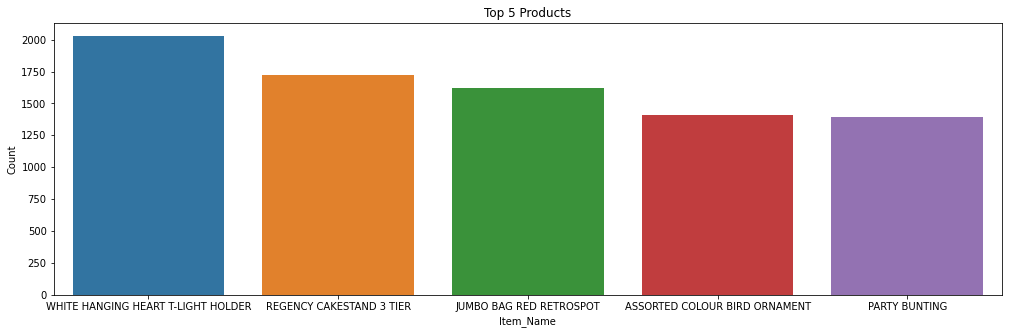

In [ ]:
#visualizing top 5 products
plt.figure(figsize=(17,5))
plt.title('Top 5 Products')
sns.barplot(x='Item_Name',y='Count',data=df_sold[:5])

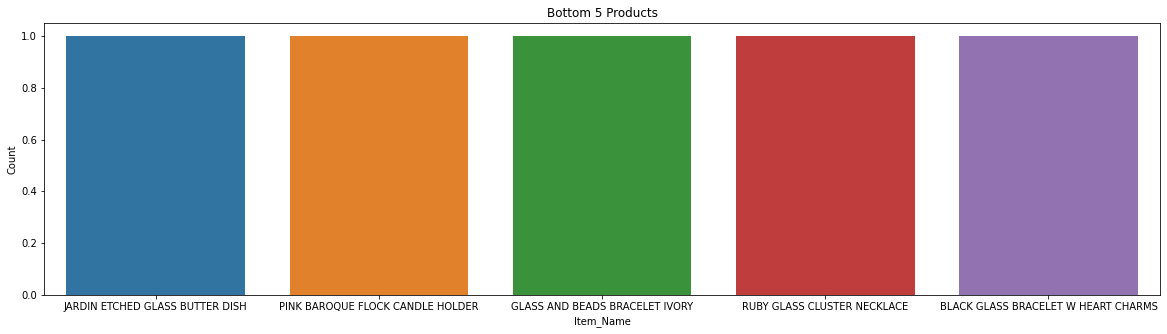

In [ ]:
#visualizing bottom 5 products
plt.figure(figsize=(20,5))
plt.title('Bottom 5 Products')
sns.barplot(x='Item_Name',y='Count',data=df_sold[-5:])

In [ ]:
df_sold[:5]

,Item_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
df_sold[-5:]

,Item_Name,Count
3872,JARDIN ETCHED GLASS BUTTER DISH,1
3873,PINK BAROQUE FLOCK CANDLE HOLDER,1
3874,GLASS AND BEADS BRACELET IVORY,1
3875,RUBY GLASS CLUSTER NECKLACE,1
3876,BLACK GLASS BRACELET W HEART CHARMS,1


* **Top product  based on maximum selling  are :**


1.   	WHITE HANGING HEART T-LIGHT HOLDER
2.   REGENCY CAKESTAND 3 TIER
3.JUMBO BAG RED RETROSPOT
4.ASSORTED COLOUR BIRD ORNAMENT
5.PARTY BUNTING



* **Bottom 5 Product based on the selling are:e**


1.   	CAT WITH SUNGLASSES BLANK CARD
2.   PINK CRYSTAL GUITAR PHONE CHARM
3.FOOD COVER WITH BEADS , SET 2 SIZES
4.GLASS BEAD HOOP EARRINGS BLACK
5.	ROSE PENDANT TRIPLE SHELL NECKLACE

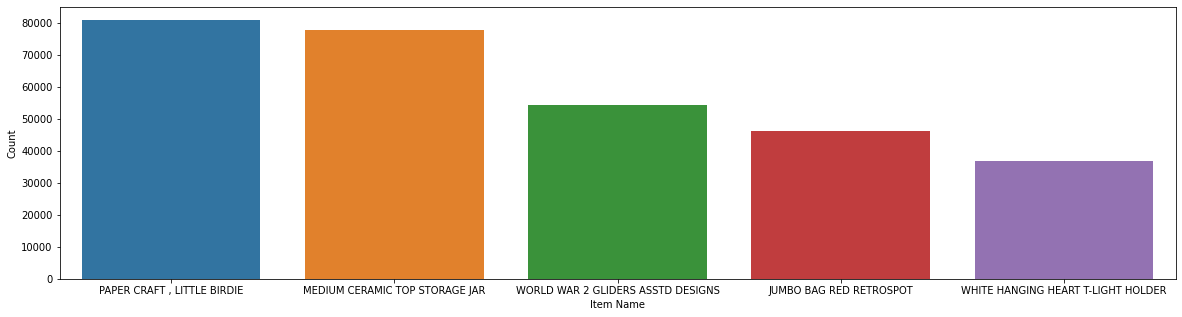

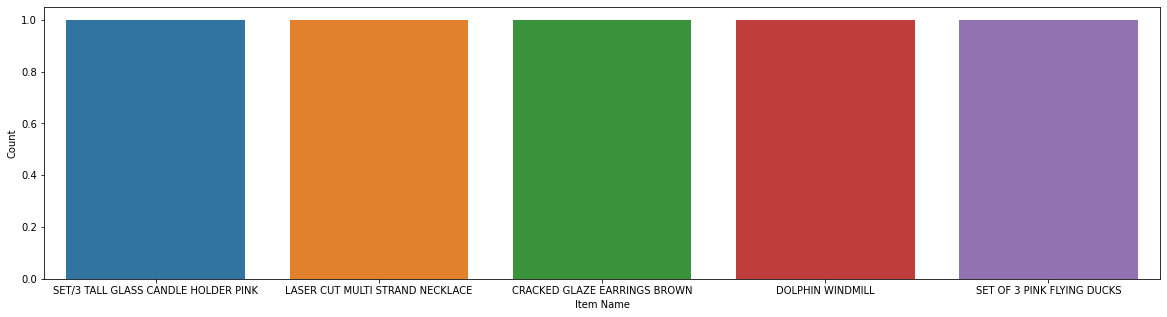

In [ ]:
#Top 5products sold according to their quantity
quantity=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_five=quantity[:5]
plt.figure(figsize=(20,5))
ax=sns.barplot(x=top_five.index,y=top_five)
ax.set(xlabel='Item Name', ylabel="Count")
plt.show()

#Bottom 5products sold according to their quantity
bottom_five=quantity[-5:]
plt.figure(figsize=(20,5))
ax=sns.barplot(x=bottom_five.index,y=bottom_five)
ax.set(xlabel='Item Name', ylabel="Count")
plt.show()

**Top 5 maximum Sold products according to quantity are**


1.   	PAPER CRAFT , LITTLE BIRDIE       
2. MEDIUM CERAMIC TOP STORAGE JAR   
3.WORLD WAR 2 GLIDERS ASSTD DESIGNS    
4.JUMBO BAG RED RETROSPOT          
5.WHITE HANGING HEART T-LIGHT HOLDER 

**Bottom 5 least Sold products according to quantity are**


1.   	SET/3 TALL GLASS CANDLE HOLDER PINK    
2.LASER CUT MULTI STRAND NECKLACE        
3.CRACKED GLAZE EARRINGS BROWN           
4.DOLPHIN WINDMILL                       
5.SET OF 3 PINK FLYING DUCKS  

In [ ]:
condat=df['Country'].value_counts().reset_index()
condat.rename(columns={'index':'Countries'},inplace=True)
condat.rename(columns={'Country':'Count'},inplace=True)
print(condat.head())
print("--"*30)
print(condat.tail())

        Countries   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485
------------------------------------------------------------
         Countries  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9


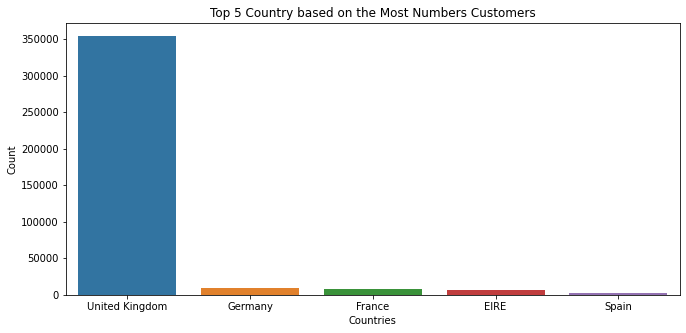

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Countries',y='Count',data=condat[:5])

* From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain

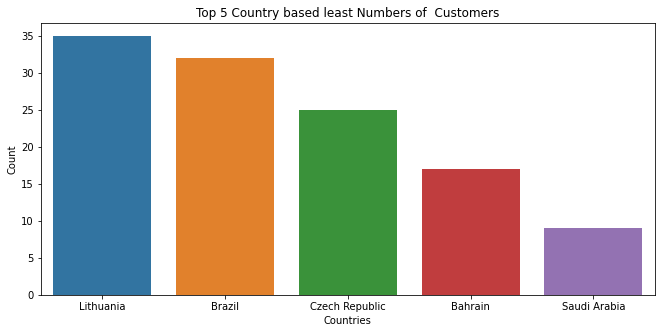

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Countries',y='Count',data=condat[-5:])

* From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain  and Saudi Arabia

**1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode**


**2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode**

**3. For symmetric graph mean=median=mode**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


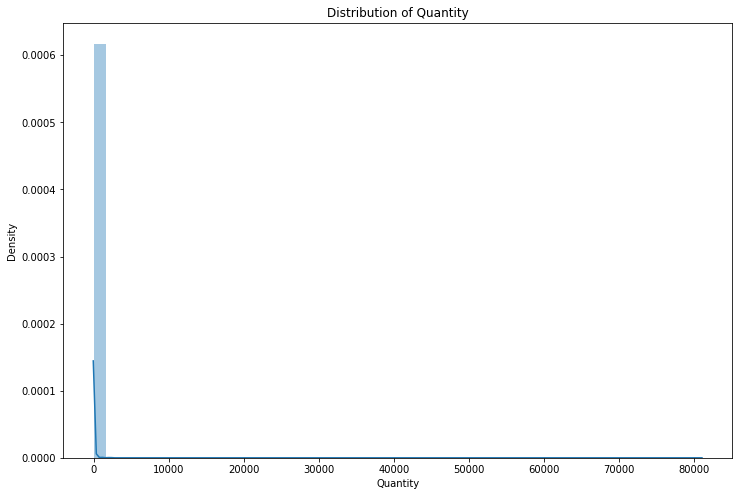

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Quantity')
sns.distplot(df['Quantity'])

Using Log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


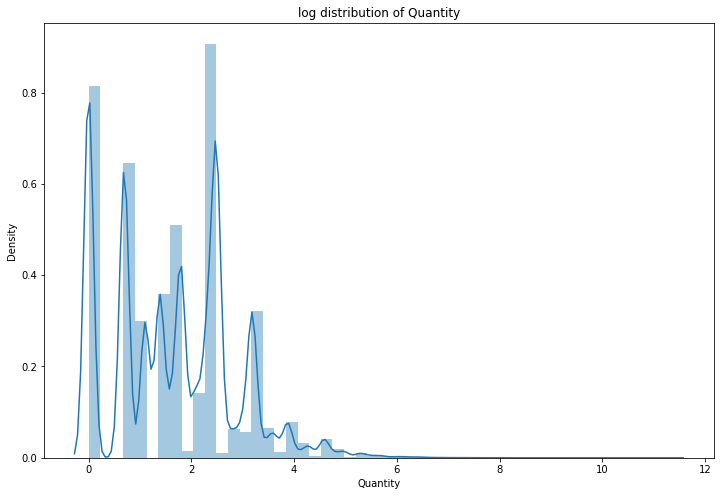

In [ ]:
plt.figure(figsize=(12,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

Distribution for Unit price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


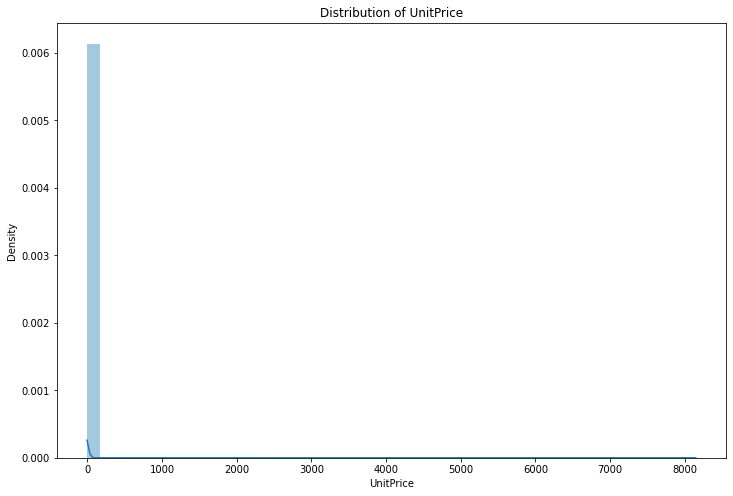

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of UnitPrice')
sns.distplot(df['UnitPrice'])

For any succesfull purchase the unit price should be greater than zero

In [ ]:
#dropping if any unit price less than zero or free
df=df[df['UnitPrice']>0]

##**Feature Engineering**

In [ ]:
#Converting invoice data into date time stamp
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#seperating all the day month and year into different columns
df['Day']=df['InvoiceDate'].dt.day_name()
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df['Month']=df['InvoiceDate'].dt.month_name()
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

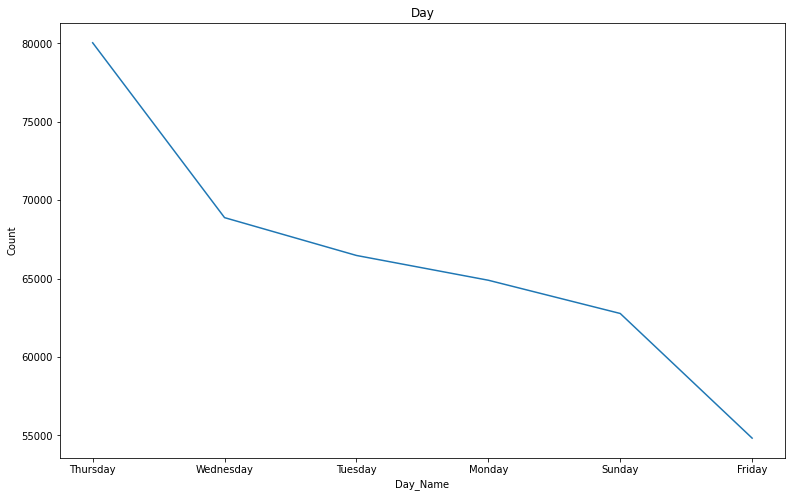

In [ ]:
#visualizing according to day
dayd=df['Day'].value_counts().reset_index()
dayd.rename(columns={'index': 'Day_Name'}, inplace=True)
dayd.rename(columns={'Day': 'Count'}, inplace=True)
plt.figure(figsize=(13,8))
plt.title('Day')
sns.lineplot(x='Day_Name',y='Count',data=dayd)


*It is clear that most Sales are on Thrusday>Wednesday>Tuesday respectively

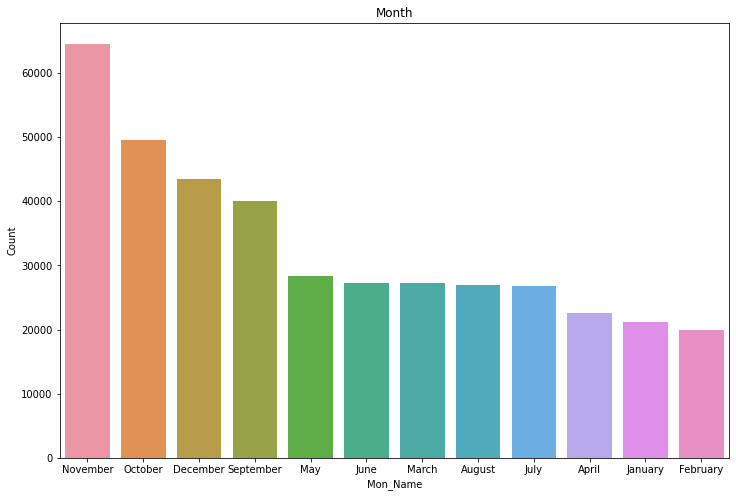

In [ ]:
#visualizing according to month
mond=df['Month'].value_counts().reset_index()
mond.rename(columns={'index': 'Mon_Name'}, inplace=True)
mond.rename(columns={'Month': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Mon_Name',y='Count',data=mond)


###**most numbers of customers have purches the gifts in the month of November ,October and December September**

####**less numbers of customers have purches the gifts in the month of April ,january and February**

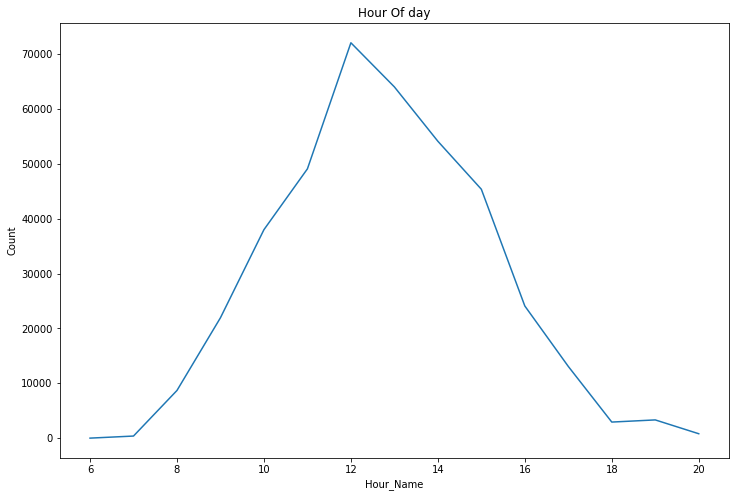

In [ ]:
#visualizing according to hour
hord=df['hour'].value_counts().reset_index()
hord.rename(columns={'index': 'Hour_Name'}, inplace=True)
hord.rename(columns={'hour': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Hour Of day')
sns.lineplot(x='Hour_Name',y='Count',data=hord)


* It is likely that the majority of sales take place between the 9 am to 10 a.m. and 4 p.m. Between the evenings of 12 p.m. and 4 p.m., sales are at their peak.



##**Data Modeling**

###Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

###Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.


###Calculating RFM scores

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [ ]:
#for creating monetary value
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_d = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_d['InvoiceDate'] = rfm_d['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_d.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_d.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_d.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


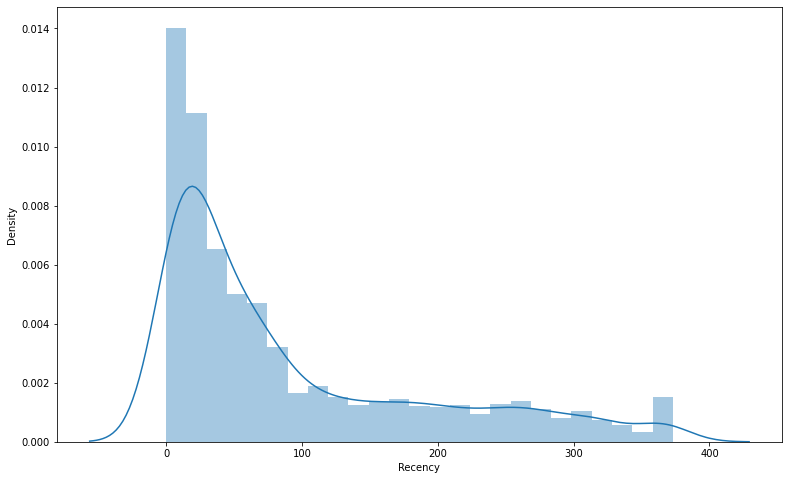

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_d['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

Most of the orders are recent

In [ ]:
#Descriptive Statistics (Frequency)
rfm_d.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


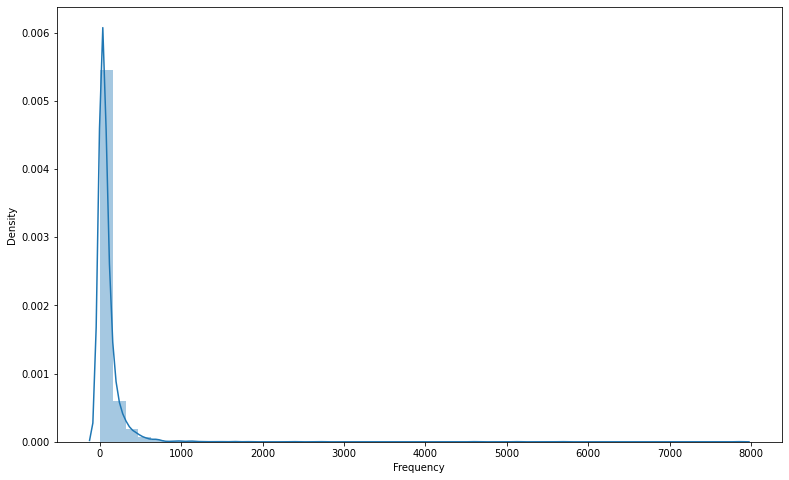

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_d['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

Most of the customers are frequent buyers

In [ ]:
#Descriptive Statistics (Monetary)
rfm_d.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


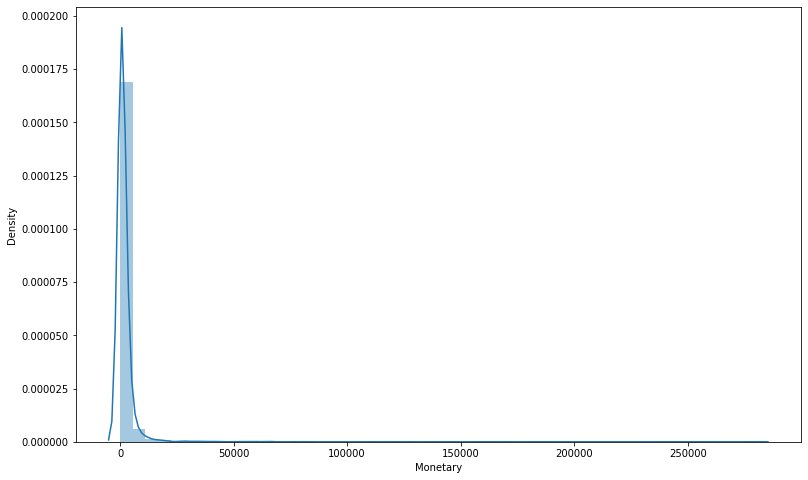

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_d['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_d.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

###**Calculating RFM Scores**

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_d['R'] = rfm_d['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_d['F'] = rfm_d['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_d['M'] = rfm_d['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_d.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_d['RFMGroup'] = rfm_d.R.map(str) + rfm_d.F.map(str) + rfm_d.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_d['RFMScore'] = rfm_d[['R', 'F', 'M']].sum(axis = 1)
rfm_d.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_d['Recency'] = [handle_neg_n_zero(x) for x in rfm_d.Recency]
rfm_d['Monetary'] = [handle_neg_n_zero(x) for x in rfm_d.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_d[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


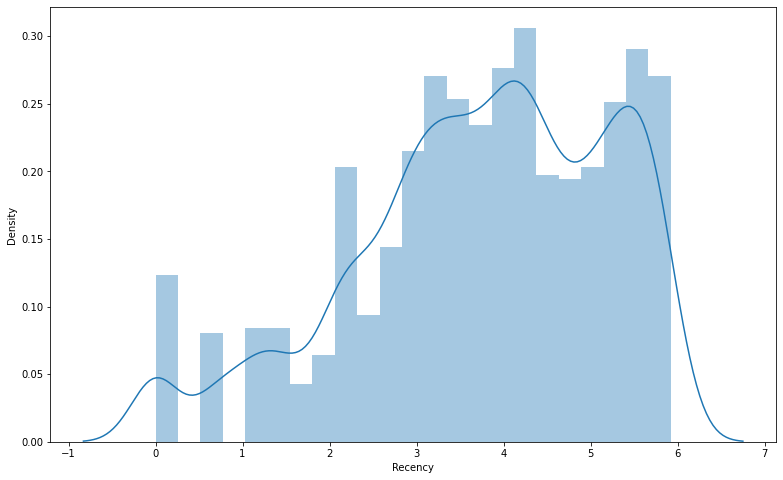

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


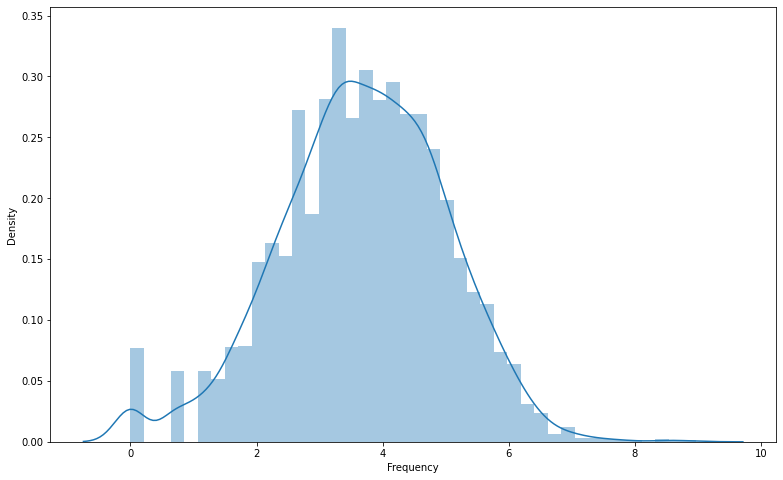

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


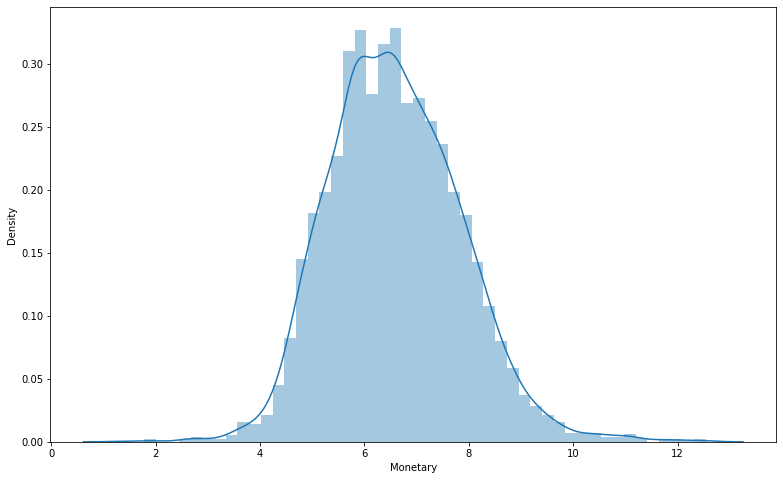

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_d['Recency_log'] = rfm_d['Recency'].apply(np.log)
rfm_d['Frequency_log'] = rfm_d['Frequency'].apply(np.log)
rfm_d['Monetary_log'] = rfm_d['Monetary'].apply(np.log)

##**Modeling for Recency and Monetary**

### **K-Means**

**K Means by silhoutte score**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
silscore=[]
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silscore.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42138910122697165
For n_clusters = 3, silhouette score is 0.34340822529173637
For n_clusters = 4, silhouette score is 0.364717216775287
For n_clusters = 5, silhouette score is 0.3403458969109156
For n_clusters = 6, silhouette score is 0.3443656528899012
For n_clusters = 7, silhouette score is 0.3478792163000836
For n_clusters = 8, silhouette score is 0.33717867019682934
For n_clusters = 9, silhouette score is 0.34585303737462747
For n_clusters = 10, silhouette score is 0.34826092771645084
For n_clusters = 11, silhouette score is 0.3375654346536051
For n_clusters = 12, silhouette score is 0.3438208900711547
For n_clusters = 13, silhouette score is 0.341897847433216
For n_clusters = 14, silhouette score is 0.3445909968004576
For n_clusters = 15, silhouette score is 0.3390553596415117


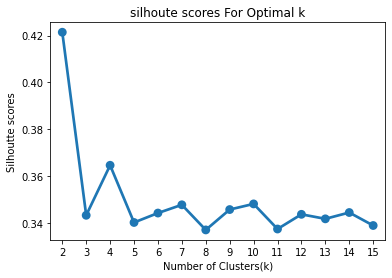

In [ ]:
sns.pointplot(x = range_n_clusters, y = silscore)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

* It depends on how many types of clusters we require for business purposes from the graph. Number of clusters = 2 is the best choice, followed by Number of clusters = 4.

**Kmeans by elbow method**

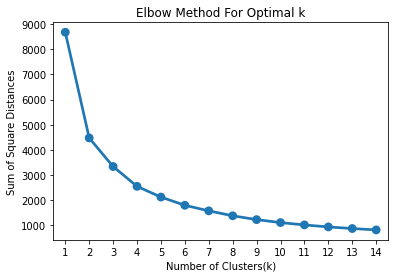

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* According to the elbow technique, the number of clusters should ideally be two, however this depends on the business requirements.

In [ ]:
#fitting model for k=2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

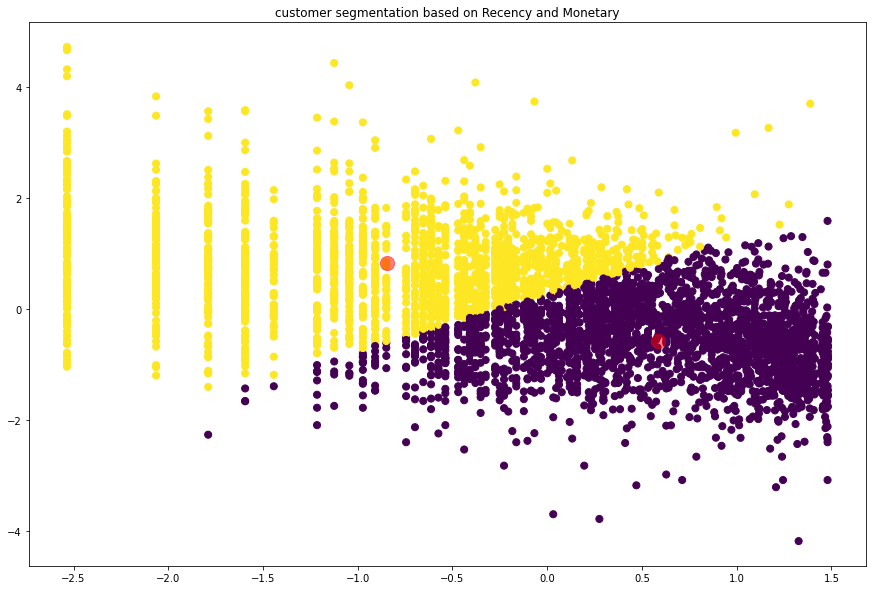

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50,)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### **DBSCAN**

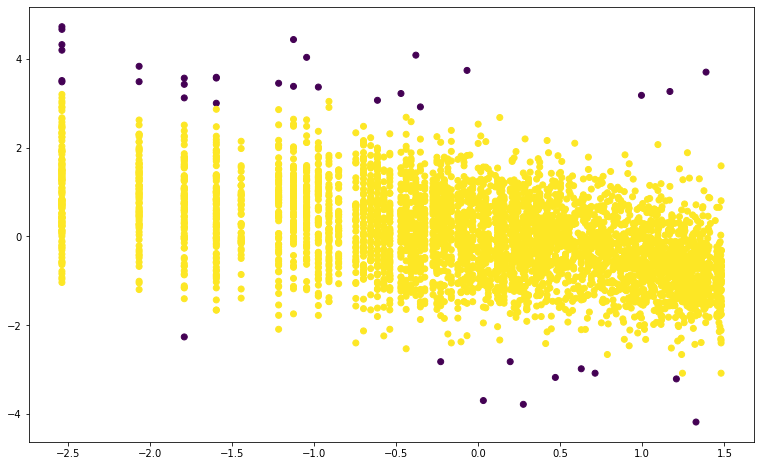

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

###**we see that ,Customers are well separate when we cluster them by Recency and Monetary**

##**Modeling for Frequency and Monetary**

### **K-Means**

**K Means by silhoutte score**

In [ ]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_d[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silscore=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silscore.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40768230838359115
For n_clusters = 4, silhouette score is 0.3715302327025385
For n_clusters = 5, silhouette score is 0.34523735826516383
For n_clusters = 6, silhouette score is 0.3596560824318888
For n_clusters = 7, silhouette score is 0.3387908195896153
For n_clusters = 8, silhouette score is 0.34369438415426995
For n_clusters = 9, silhouette score is 0.34594279012246043
For n_clusters = 10, silhouette score is 0.34524631914165965
For n_clusters = 11, silhouette score is 0.3647338851777909
For n_clusters = 12, silhouette score is 0.3532127821410574
For n_clusters = 13, silhouette score is 0.3498649459624732
For n_clusters = 14, silhouette score is 0.36923253484481683
For n_clusters = 15, silhouette score is 0.35903473643479117


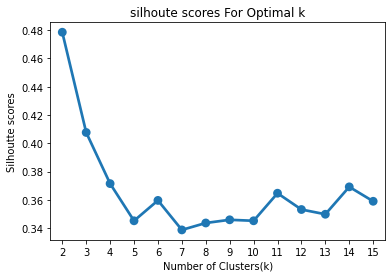

In [ ]:
sns.pointplot(x = range_n_clusters, y = silscore)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

It depends on how much types of clusters do we require for business purpose from the graph Number of clusters=2 is best followed by Number of clusters =3

**K Means by Elbow Method**

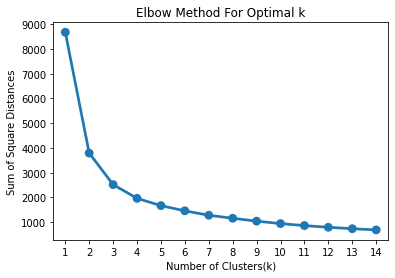

In [ ]:
features_rec_mon=['Frequency_log','Monetary_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By elbow method also ideal number of clusters is 2

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

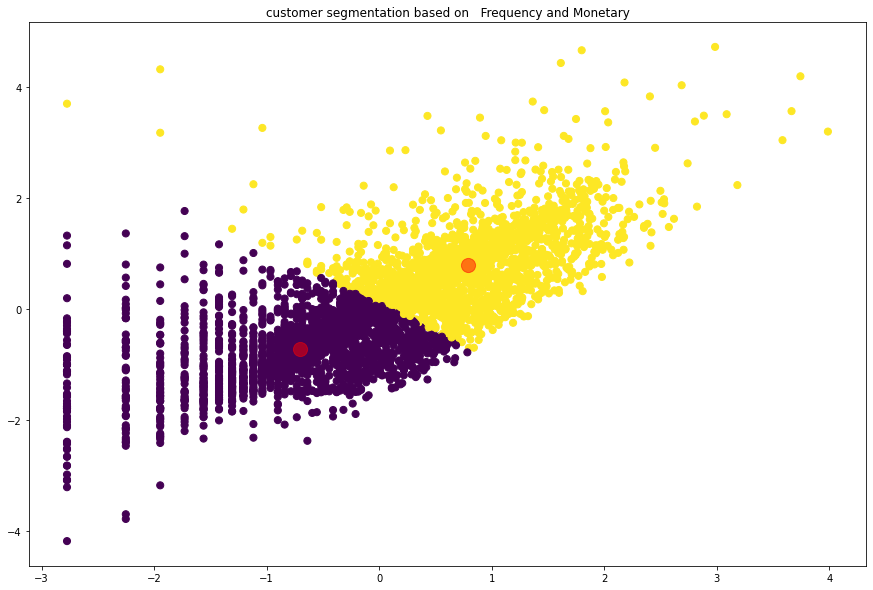

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### **DBSCAN**

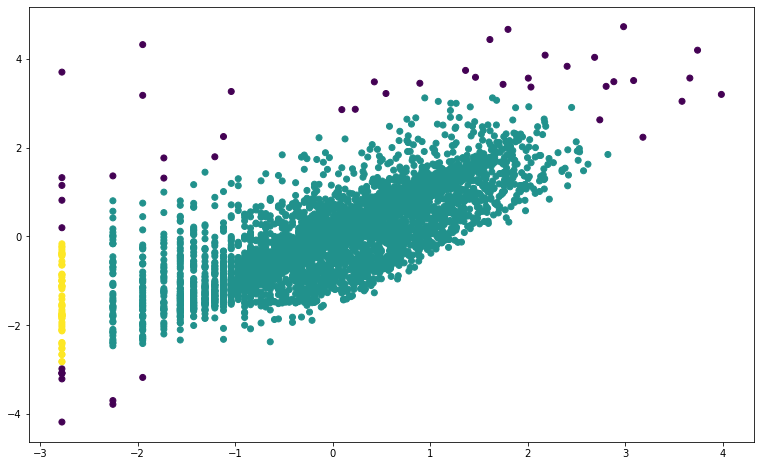

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

By DBSCAN clusters observed are 3

##**Modeling for Recency and Frequency**

###**K Means**

**K Means by silhoutte score**

In [ ]:
features_fre_mon=['Recency_log','Frequency_log']
X_features_fre_mon=rfm_d[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silscore=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silscore.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41994900631733667
For n_clusters = 3, silhouette score is 0.3436651858373559
For n_clusters = 4, silhouette score is 0.3505438262142035
For n_clusters = 5, silhouette score is 0.3473666585827373
For n_clusters = 6, silhouette score is 0.33687353269298104
For n_clusters = 7, silhouette score is 0.3444647433647074
For n_clusters = 8, silhouette score is 0.3477247400744078
For n_clusters = 9, silhouette score is 0.3372183949090333
For n_clusters = 10, silhouette score is 0.34320901794934294
For n_clusters = 11, silhouette score is 0.345387830769609
For n_clusters = 12, silhouette score is 0.3450994878506363
For n_clusters = 13, silhouette score is 0.3515674599831844
For n_clusters = 14, silhouette score is 0.3511074329639433
For n_clusters = 15, silhouette score is 0.3525526915058507


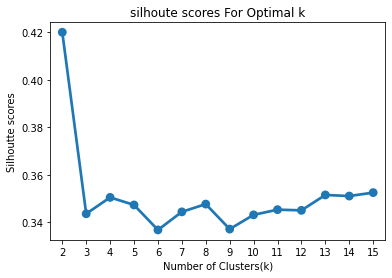

In [ ]:
sns.pointplot(x = range_n_clusters, y = silscore)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

It depends on how much types of clusters do we require for business purpose from the graph Number of clusters=2 is best followed by Number of clusters =4

**K Means by Elbow Method**

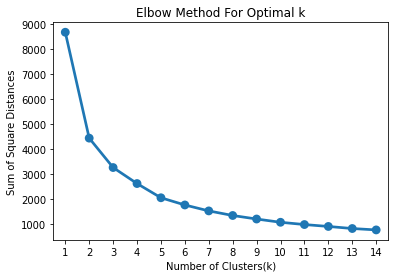

In [ ]:
features_rec_mon=['Recency_log','Frequency_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By elbow method also the ideal number of clusters is 2

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

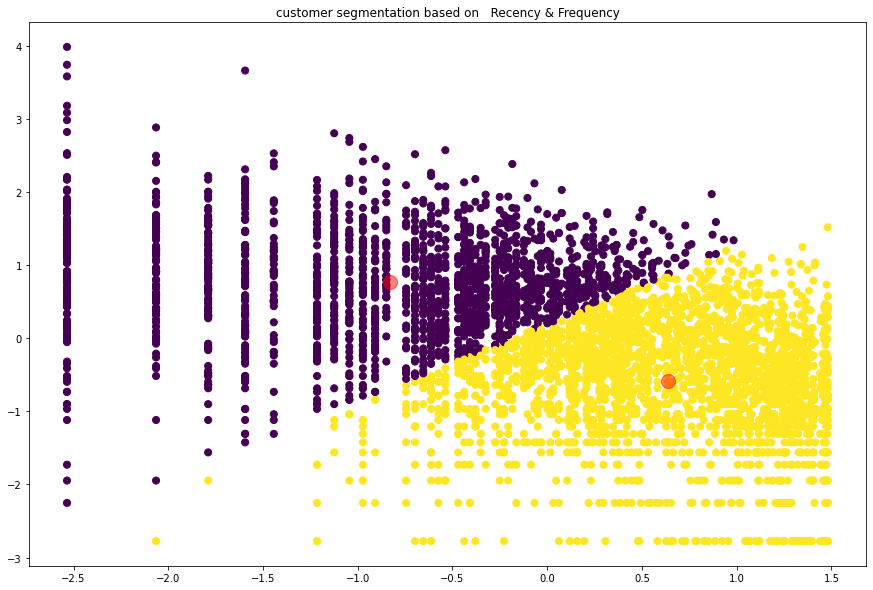

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Recency & Frequency')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**DBSCAN**

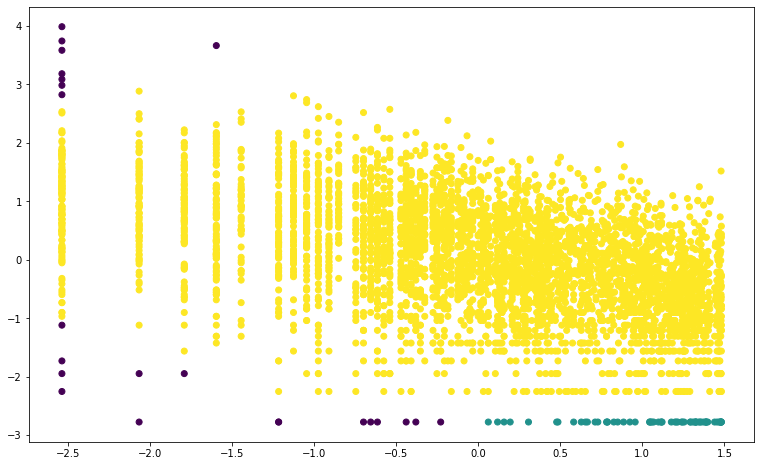

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

By DBSCAN optimal number of cluster observed is 3

##**Modeling for Recency, Monetary Value and Frequency**

###**K-Means**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


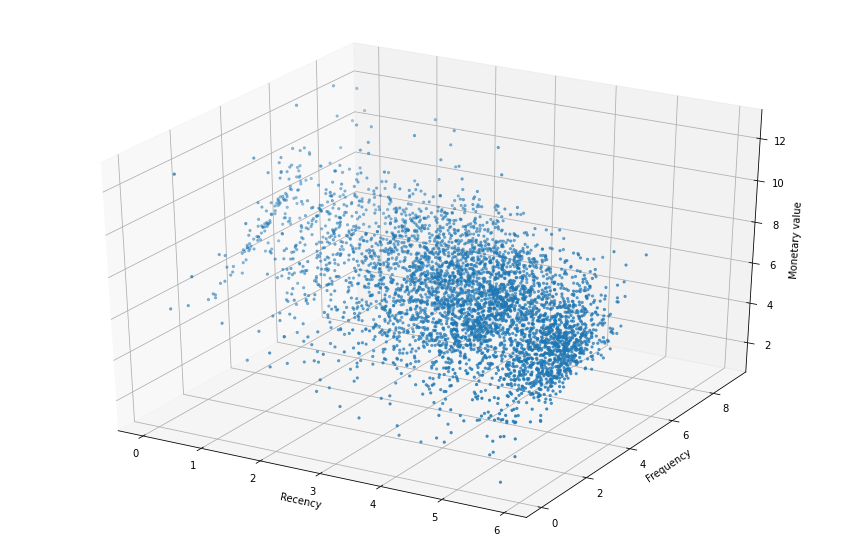

In [ ]:
#visualizing all the three
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_d.Recency_log
ys=rfm_d.Frequency_log
zs=rfm_d.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

**K Means by silhoutte score**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_d[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silscor=[]

for n_clusters in range_n_clusters:
    

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silscor.append(silhouette_avg)

    

For n_clusters = 2 The average silhouette_score is : 0.3956478042246982
For n_clusters = 3 The average silhouette_score is : 0.3049826724447913
For n_clusters = 4 The average silhouette_score is : 0.30279724233096916
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.2613208163968789
For n_clusters = 8 The average silhouette_score is : 0.2640918249728342
For n_clusters = 9 The average silhouette_score is : 0.2585642595481418
For n_clusters = 10 The average silhouette_score is : 0.2644733794304285
For n_clusters = 11 The average silhouette_score is : 0.2592423011915937
For n_clusters = 12 The average silhouette_score is : 0.26503813251658404
For n_clusters = 13 The average silhouette_score is : 0.2621555416679574
For n_clusters = 14 The average silhouette_score is : 0.26140947155997746
For n_clusters = 15 The average silhouette_score is : 0.

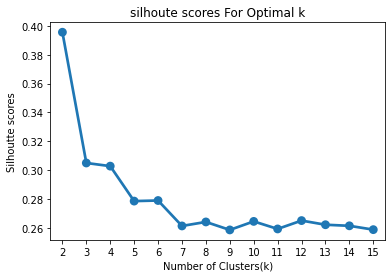

In [ ]:
sns.pointplot(x = range_n_clusters, y = silscor)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

It depends on how much types of clusters do we require for business purpose from the graph Number of clusters=2 is best followed by Number of clusters 3

**K Means by Elbow Method**

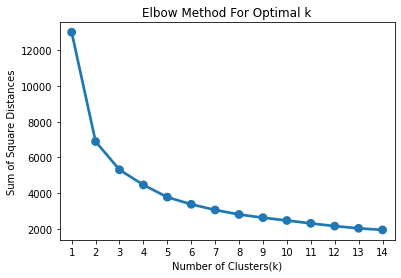

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By Elbow method also number of clusters is 2

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

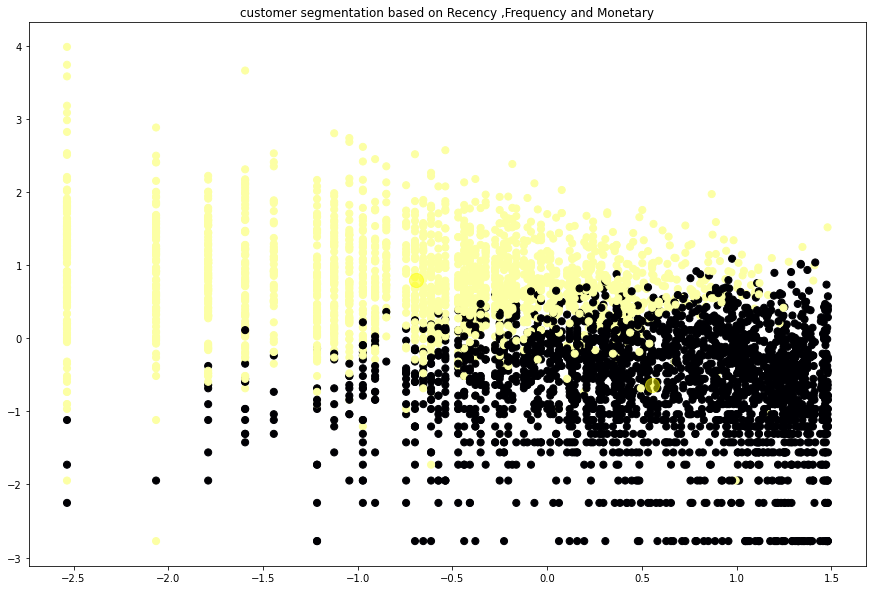

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_d['Cluster'] = KMean_clust.labels_
rfm_d.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,0
12353.0,204,4,89.00,4,4,4,444,12,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,5.446737,4.060443,6.984161,1
12355.0,214,13,459.40,4,4,3,443,11,5.365976,2.564949,6.129921,1


###**DBSCAN**

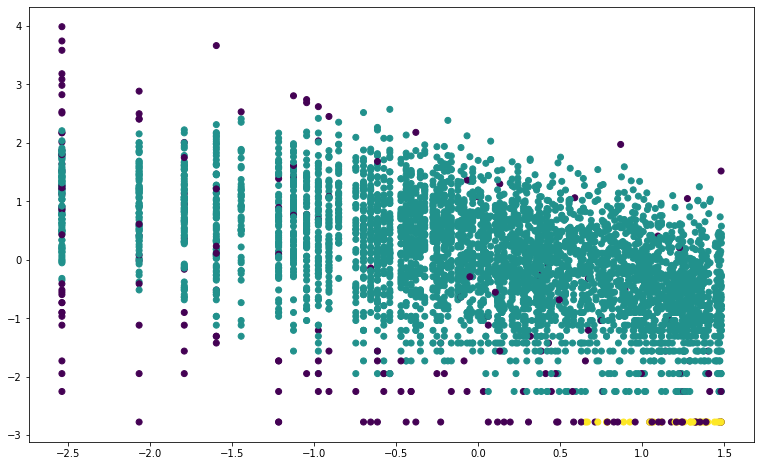

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

By DBSCAN ideal number of cluster is 3

##**Conclusion:**

In [ ]:
#making table
from prettytable import PrettyTable 
print("Recency and Monetary")
print("----"*6)
# Specify the Column Names while initializing the Table 
rm = PrettyTable(['Model' ,'Ideal Number of Clusters']) 
  
# Add rows 
rm.add_row(["1. K-Means with silhouette_score ",  "2"]) 
rm.add_row(["2. K-Means with Elbow methos  ", "2"])
rm.add_row(["3. DBSCAN ",  "2"]) 
print(rm)
print("Frequency and Monetary")
print("----"*6)

# Specify the Column Names while initializing the Table 
fm= PrettyTable(['Model' ,'Ideal Number of Clusters']) 
  
# Add rows 
fm.add_row(["1. K-Means with silhouette_score ",  "2"]) 
fm.add_row(["2. K-Means with Elbow method  ", "2"])
fm.add_row(["3. DBSCAN ",  "3"]) 
print(fm)
print("Recency and Frequency")
print("----"*6)
# Specify the Column Names while initializing the Table 
rf= PrettyTable(['Model' ,'Ideal Number of Clusters']) 
  
# Add rows 
rf.add_row(["1. K-Means with silhouette_score ",  "2"]) 
rf.add_row(["2. K-Means with Elbow method  ", "2"])
rf.add_row(["3. DBSCAN ",  "3"]) 
print(rf)
print("Recency, Frequency and Monetary")
print("----"*6)
# Specify the Column Names while initializing the Table 
rfm= PrettyTable(['Model' ,'Ideal Number of Clusters']) 
  
# Add rows 
rfm.add_row(["1. K-Means with silhouette_score ",  "2"]) 
rfm.add_row(["2. K-Means with Elbow method  ", "2"])
rfm.add_row(["3. DBSCAN ",  "3"]) 
print(rfm)

Recency and Monetary
------------------------
+-----------------------------------+--------------------------+
|               Model               | Ideal Number of Clusters |
+-----------------------------------+--------------------------+
| 1. K-Means with silhouette_score  |            2             |
|   2. K-Means with Elbow methos    |            2             |
|             3. DBSCAN             |            2             |
+-----------------------------------+--------------------------+
Frequency and Monetary
------------------------
+-----------------------------------+--------------------------+
|               Model               | Ideal Number of Clusters |
+-----------------------------------+--------------------------+
| 1. K-Means with silhouette_score  |            2             |
|   2. K-Means with Elbow method    |            2             |
|             3. DBSCAN             |            3             |
+-----------------------------------+------------------------